In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv


In [4]:
#Step 1:Load the Data
df=pd.read_csv("/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv")
df.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


In [5]:
#Step 2:Understanding the Data:
df.shape

(10000, 12)

In [6]:
df.columns

Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [8]:
df.describe()

,lunch,test_preparation_course,reading_score,writing_score,science_score,total_score
count,9976.000000,9977.000000,9975.000000,9976.000000,9977.000000,9981.000000
mean,0.644246,0.388694,70.125915,71.415798,66.063045,264.740908
std,0.478765,0.487478,19.026245,18.245360,19.324331,42.304858
min,0.000000,0.000000,17.000000,10.000000,9.000000,89.000000
25%,0.000000,0.000000,57.000000,59.000000,53.000000,237.000000
50%,1.000000,0.000000,71.000000,72.500000,67.000000,268.000000
75%,1.000000,1.000000,85.000000,85.000000,81.000000,294.000000
max,1.000000,1.000000,100.000000,100.000000,100.000000,383.000000


In [9]:
#Step 3:Identifying Missing Values
missing_values = df.isnull().sum()
missing_values

roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64

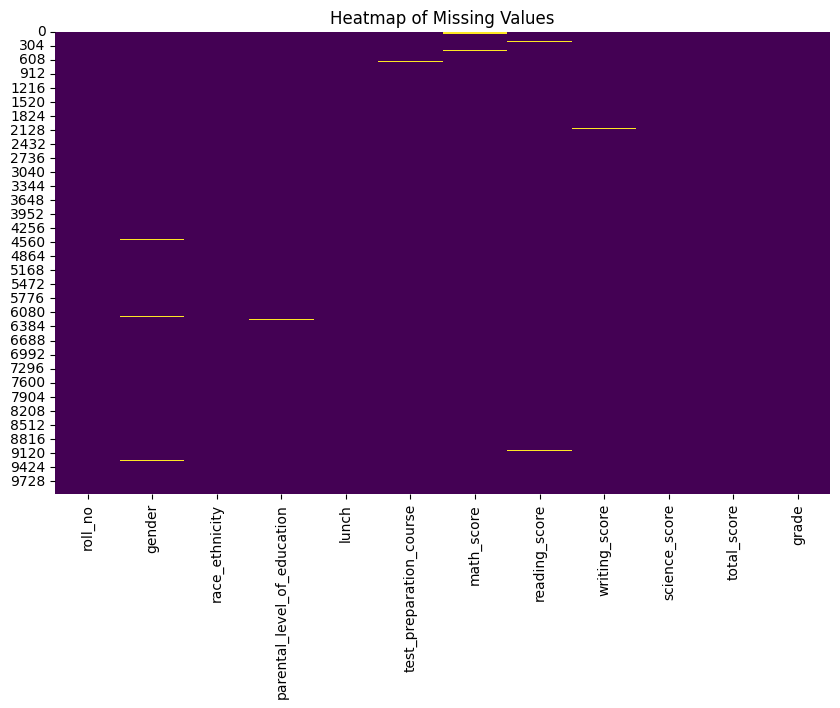

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [11]:
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coerce invalid entries to NaN

# Handle missing values
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)  # Impute missing values with median


/tmp/ipykernel_24/4103069675.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Impute missing values with median
/tmp/ipykernel_24/4103069675.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [12]:
df.isnull().sum()

roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                      0
reading_score                   0
writing_score                   0
science_score                   0
total_score                     0
grade                           3
dtype: int64

In [13]:
# Handle missing values for categorical columns using mode imputation
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'grade']

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill missing values with the mode


In [14]:
df.isnull().sum()

roll_no                        1
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64

In [15]:
missing_rollno_rows = df[df['roll_no'].isnull()]
missing_rollno_rows

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
1323,NaN,male,group D,high school,1.0,0.0,37.0,100.0,61.0,94.0,292.0,B


In [16]:
df.iloc[1320:1325]

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
1320,std-1321,male,group C,some high school,0.0,0.0,29.0,51.0,38.0,9.0,127.0,Fail
1321,std-1322,male,group D,bachelor's degree,1.0,0.0,31.0,86.0,63.0,48.0,228.0,C
1322,std-1323,male,group E,master's degree,0.0,0.0,37.0,50.0,77.0,64.0,228.0,C
1323,NaN,male,group D,high school,1.0,0.0,37.0,100.0,61.0,94.0,292.0,B
1324,std-1325,female,group E,high school,0.0,0.0,78.0,82.0,85.0,63.0,308.0,B


In [17]:
df.loc[1323,"roll_no"]="std-1324"

In [18]:
df.isnull().sum()

roll_no                        0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64

In [19]:
df.iloc[1320:1325]

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
1320,std-1321,male,group C,some high school,0.0,0.0,29.0,51.0,38.0,9.0,127.0,Fail
1321,std-1322,male,group D,bachelor's degree,1.0,0.0,31.0,86.0,63.0,48.0,228.0,C
1322,std-1323,male,group E,master's degree,0.0,0.0,37.0,50.0,77.0,64.0,228.0,C
1323,std-1324,male,group D,high school,1.0,0.0,37.0,100.0,61.0,94.0,292.0,B
1324,std-1325,female,group E,high school,0.0,0.0,78.0,82.0,85.0,63.0,308.0,B


In [20]:
#Step 4:Handle Duplicates
duplicate_count = df.duplicated().sum()
duplicate_count

0

In [21]:
if duplicate_count > 0:
    df = df.drop_duplicates()

In [22]:
#Step 5: Check for Inconsistent or Faulty Data
df["gender"].unique()

array(['male', 'female', 'Boy', '\\tmale', 'Girl'], dtype=object)

In [23]:
def clean_gender(gender):
    gender = gender.strip().lower()  
    if gender in ['male', 'boy', '\\tmale']:
        return 'male'
    elif gender in ['female', 'girl']:
        return 'female'
    else:
        return gender  # Retain the original if no match


In [24]:
df['gender'] = df['gender'].apply(clean_gender)

In [25]:
df["gender"].unique()

array(['male', 'female'], dtype=object)

In [26]:
df["race_ethnicity"].unique()

array(['group D', 'group B', 'group C', 'group E', 'group A', 'A', 'C',
       'D', 'group C\\n', 'B', 'E'], dtype=object)

In [27]:
def clean_race_ethnicity(group):
    group = group.strip().replace('\\n', '')  # Remove whitespace and newline characters
    if not group.startswith('group'):  # Add 'group' if it's missing
        group = f'group {group}'
    return group

In [28]:
df["race_ethnicity"]=df["race_ethnicity"].apply(clean_race_ethnicity)

In [29]:
df["race_ethnicity"].unique()

array(['group D', 'group B', 'group C', 'group E', 'group A'],
      dtype=object)

In [30]:
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')

In [31]:
df.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89.0,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65.0,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10.0,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22.0,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26.0,58.0,64.0,65.0,213.0,C


In [32]:
#Step 6: Droping Irrelevant Columns
df = df.drop(['roll_no'], axis=1)

In [33]:
#Step 7: Convert Data Types
df['gender'] = df['gender'].astype('category')
df['grade'] = df['grade'].astype('category')


df['math_score'] = df['math_score'].astype(float)
df['reading_score'] = df['reading_score'].astype(float)
df['writing_score'] = df['writing_score'].astype(float)
df['science_score'] = df['science_score'].astype(float)
df['total_score'] = df['total_score'].astype(float)


print("\nAfter conversion:")
print(df.info())



After conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       10000 non-null  category
 1   race_ethnicity               10000 non-null  object  
 2   parental_level_of_education  10000 non-null  object  
 3   lunch                        10000 non-null  float64 
 4   test_preparation_course      10000 non-null  float64 
 5   math_score                   10000 non-null  float64 
 6   reading_score                10000 non-null  float64 
 7   writing_score                10000 non-null  float64 
 8   science_score                10000 non-null  float64 
 9   total_score                  10000 non-null  float64 
 10  grade                        10000 non-null  category
dtypes: category(2), float64(7), object(2)
memory usage: 723.1+ KB
None


In [34]:
#Step 8: Explore Distributions
print(df['gender'].value_counts())

print(df['grade'].value_counts())


gender
female    5011
male      4989
Name: count, dtype: int64
grade
B       5662
C       2701
A        904
D        671
Fail      62
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


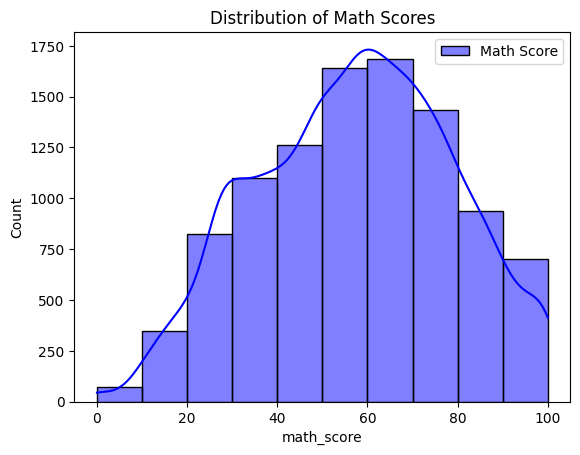

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


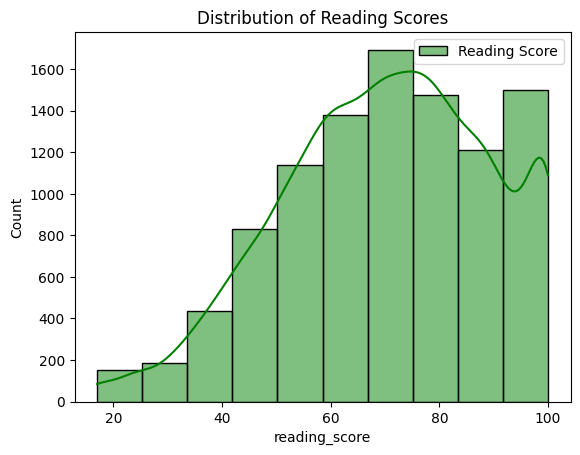

In [35]:
# Plot histograms
sns.histplot(df['math_score'], kde=True, bins=10, color='blue', label='Math Score')
plt.title('Distribution of Math Scores')
plt.legend()
plt.show()

sns.histplot(df['reading_score'], kde=True, bins=10, color='green', label='Reading Score')
plt.title('Distribution of Reading Scores')
plt.legend()
plt.show()


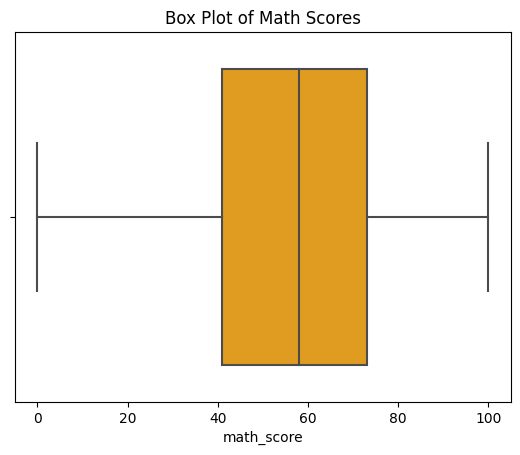

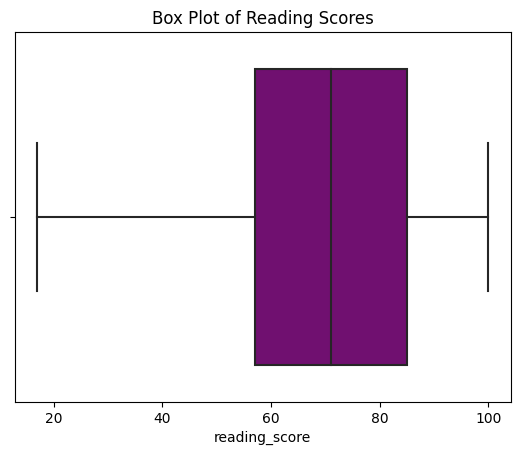

In [36]:
# Box plot for math scores
sns.boxplot(x=df['math_score'], color='orange')
plt.title('Box Plot of Math Scores')
plt.show()

# Box plot for reading scores
sns.boxplot(x=df['reading_score'], color='purple')
plt.title('Box Plot of Reading Scores')
plt.show()


In [37]:
#Step 9: Handeling Outliers
Q1 = df['math_score'].quantile(0.25)
Q3 = df['math_score'].quantile(0.75)
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['math_score'] < lower_bound) | (df['math_score'] > upper_bound)]
print("Outliers in math_score:")
print(outliers)

Outliers in math_score:
Empty DataFrame
Columns: [gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course, math_score, reading_score, writing_score, science_score, total_score, grade]
Index: []


In [38]:
#Remove Outliers
df_cleaned = df[(df['math_score'] >= lower_bound) & (df['math_score'] <= upper_bound)]

In [39]:
#Step 10: Encode Categorical Variables
df_one_hot = pd.get_dummies(df, columns=['gender', 'grade'], drop_first=True)
print("One-hot encoded data:")
print(df_one_hot)

One-hot encoded data:
     race_ethnicity parental_level_of_education  lunch  \
0           group D                some college    1.0   
1           group B                 high school    1.0   
2           group C             master's degree    1.0   
3           group D                some college    1.0   
4           group C                some college    0.0   
...             ...                         ...    ...   
9995        group C                some college    1.0   
9996        group C           bachelor's degree    1.0   
9997        group B          associate's degree    1.0   
9998        group B            some high school    1.0   
9999        group B                 high school    1.0   

      test_preparation_course  math_score  reading_score  writing_score  \
0                         1.0        89.0           38.0           85.0   
1                         0.0        65.0          100.0           67.0   
2                         0.0        10.0           99.0

In [40]:
le_gender = LabelEncoder()
le_grade = LabelEncoder()

df['gender_encoded'] = le_gender.fit_transform(df['gender'])
df['grade_encoded'] = le_grade.fit_transform(df['grade'])
print("Label encoded data:")
print(df)

Label encoded data:
      gender race_ethnicity parental_level_of_education  lunch  \
0       male        group D                some college    1.0   
1       male        group B                 high school    1.0   
2       male        group C             master's degree    1.0   
3       male        group D                some college    1.0   
4       male        group C                some college    0.0   
...      ...            ...                         ...    ...   
9995  female        group C                some college    1.0   
9996  female        group C           bachelor's degree    1.0   
9997  female        group B          associate's degree    1.0   
9998  female        group B            some high school    1.0   
9999  female        group B                 high school    1.0   

      test_preparation_course  math_score  reading_score  writing_score  \
0                         1.0        89.0           38.0           85.0   
1                         0.0        

In [41]:
#Step 11: Correlation Analysis
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
                            lunch  test_preparation_course  math_score  \
lunch                    1.000000                 0.037017    0.041066   
test_preparation_course  0.037017                 1.000000    0.042125   
math_score               0.041066                 0.042125    1.000000   
reading_score           -0.002094                 0.011516   -0.035964   
writing_score            0.019771                 0.032537    0.096341   
science_score            0.061064                -0.000264    0.084844   
total_score              0.056579                 0.040018    0.576838   
gender_encoded          -0.078751                -0.036833   -0.282141   
grade_encoded           -0.051566                -0.045351   -0.532972   

                         reading_score  writing_score  science_score  \
lunch                        -0.002094       0.019771       0.061064   
test_preparation_course       0.011516       0.032537      -0.000264   
math_score             

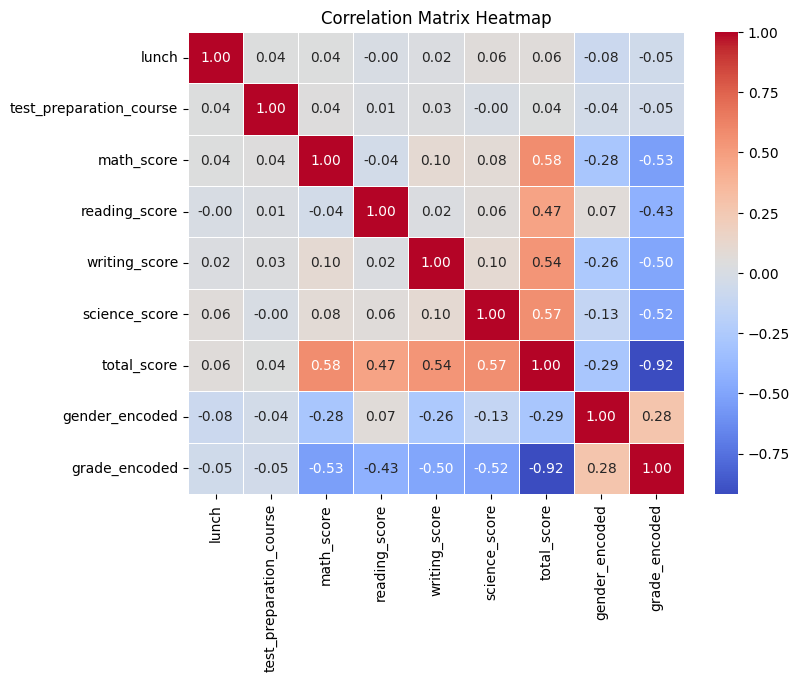

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

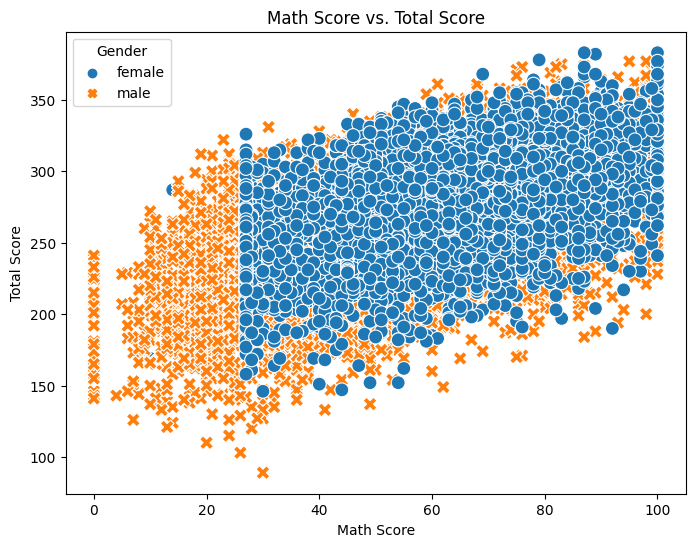

In [43]:
#Step 12: Investigate Relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='math_score', y='total_score', hue='gender', style='gender', s=100)
plt.title('Math Score vs. Total Score')
plt.xlabel('Math Score')
plt.ylabel('Total Score')
plt.legend(title='Gender')
plt.show()

/tmp/ipykernel_24/221829678.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='gender', y='math_score', ci='sd', palette='coolwarm')
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


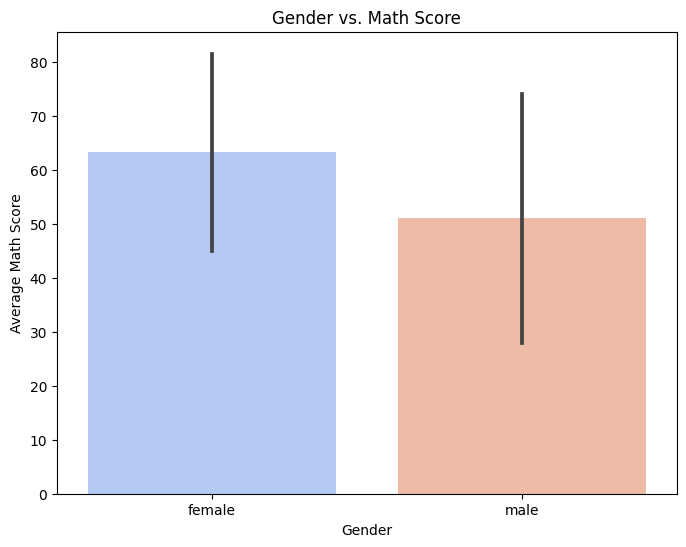

In [44]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='gender', y='math_score', ci='sd', palette='coolwarm')
plt.title('Gender vs. Math Score')
plt.xlabel('Gender')
plt.ylabel('Average Math Score')
plt.show()

In [45]:
#Step 13: Feature Engineering
max_score = 300

df['performance_ratio'] = df['total_score'] / max_score

print("Data with performance_ratio:")
print(df)

Data with performance_ratio:
      gender race_ethnicity parental_level_of_education  lunch  \
0       male        group D                some college    1.0   
1       male        group B                 high school    1.0   
2       male        group C             master's degree    1.0   
3       male        group D                some college    1.0   
4       male        group C                some college    0.0   
...      ...            ...                         ...    ...   
9995  female        group C                some college    1.0   
9996  female        group C           bachelor's degree    1.0   
9997  female        group B          associate's degree    1.0   
9998  female        group B            some high school    1.0   
9999  female        group B                 high school    1.0   

      test_preparation_course  math_score  reading_score  writing_score  \
0                         1.0        89.0           38.0           85.0   
1                         0.

In [46]:
bins = [0, 0.7, 0.85, 1.0]  
labels = ['low', 'medium', 'high'] 

df['performance_category'] = pd.cut(df['performance_ratio'], bins=bins, labels=labels)

print("Data with performance_category:")
print(df)

Data with performance_category:
      gender race_ethnicity parental_level_of_education  lunch  \
0       male        group D                some college    1.0   
1       male        group B                 high school    1.0   
2       male        group C             master's degree    1.0   
3       male        group D                some college    1.0   
4       male        group C                some college    0.0   
...      ...            ...                         ...    ...   
9995  female        group C                some college    1.0   
9996  female        group C           bachelor's degree    1.0   
9997  female        group B          associate's degree    1.0   
9998  female        group B            some high school    1.0   
9999  female        group B                 high school    1.0   

      test_preparation_course  math_score  reading_score  writing_score  \
0                         1.0        89.0           38.0           85.0   
1                        